<a href="https://colab.research.google.com/github/iqrahashmi-26/Colab-Projects/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/diptaraj23/EXPLORATORY-DATA-ANALYSIS-EDA-OF-WEST-BENGAL-POLL-2021/refs/heads/main/WB%20POLL%20DATASETS%202021/west_bengal.csv')
test

,candidate,constituency,party,criminal_cases,education,total_assets,liabilities
0,Abdul Hai Mallik,ONDA,IND,0,8th Pass,160171,0
1,Abdur Razzak Molla,FALTA,INC,2,10th Pass,2650450,0
2,Abhijit Bhattacharya,PURULIA,IND,0,Post Graduate,4439532,375000
3,Abir Chandra Mandal,CHHATNA,IND,0,Graduate Professional,809000,0
4,Adhikari Suvendu,NANDIGRAM,BJP,1,Post Graduate,10552749,0
...,...,...,...,...,...,...,...
562,Uttam Naskar,BISHNUPUR (SC),IND,0,10th Pass,511291,0
563,Uttara Singha Hazra,GARBETA,AITC,1,Graduate,17710285,6348523
564,Vibekananda Mondal,ULUBERIA UTTAR (SC),IND,0,12th Pass,11953,0
565,Vivekananda Bauri,RAGHUNATHPUR (SC),BJP,0,Graduate Professional,2030856,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   candidate       567 non-null    object
 1   constituency    567 non-null    object
 2   party           567 non-null    object
 3   criminal_cases  567 non-null    int64 
 4   education       567 non-null    object
 5   total_assets    567 non-null    int64 
 6   liabilities     567 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 31.1+ KB


In [ ]:
candidate_vote= test['party'].value_counts()
candidate_vote

,count
party,
IND,137
BJP,90
AITC,90
SUCI(C),74
CPI(M),46
BSP,31
INC,22
Rashtriya Secular Majlis Party,11
Amra Bangalee,10


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
test['constituency'].nunique()

91

In [ ]:
constituency_place = test['constituency'].value_counts().head(20)
fig = px.bar(x=constituency_place.index, y=constituency_place, title='Top 20 Constituency Name')
fig.show()

In [ ]:
constituency_place = test['constituency'].value_counts().head(20)
fig = px.box(x=constituency_place.index, y=constituency_place, title='Top 20 Constituency Name')
fig.show()

In [ ]:
constituency_place= test['constituency'].value_counts().head()
fig = px.scatter(x=constituency_place.index, y=constituency_place, title='Top 20 Constituency Name')
fig.show()

In [ ]:
total_candidate_party = test.groupby('party')['candidate'].nunique().reset_index(name='tottal candidate').sort_values(by='tottal candidate', ascending=False)
total_candidate_party.index = pd.RangeIndex(len(total_candidate_party.index))
total_candidate_party.style.background_gradient(cmap='rainbow')

,party,tottal candidate
0,IND,137
1,AITC,90
2,BJP,90
3,SUCI(C),74
4,CPI(M),46
5,BSP,30
6,INC,22
7,Rashtriya Secular Majlis Party,11
8,Bahujan Mukti Party,10
9,Amra Bangalee,10


In [ ]:
criminal = test[test['criminal_cases']!=0]
criminal = criminal.groupby(['candidate', 'party'])['criminal_cases'].max().reset_index().sort_values(by = 'criminal_cases',ascending=False)
criminal.style.background_gradient(cmap='Blues')

,candidate,party,criminal_cases
18,Barun Pramanik (Chitta),BJP,27
55,Himangshu Das,CPI(M),24
19,Bharati Ghosh,BJP,19
119,Sk. Mainuddin,Rashtriya Secular Majlis Party,15
137,Tapan Kumar Ghosh,CPI(M),14
42,Dinen Roy,AITC,13
35,Debjit Sarkar,BJP,11
88,Partha Pratim Das,AITC,10
39,Dilip Kumar Jatua,BJP,9
87,Paresh Ram Das,AITC,9


In [ ]:
total_Asset = test.groupby('party')['total_assets'].sum().reset_index().sort_values(by='total_assets', ascending=False)
total_Asset.style.background_gradient(cmap='RdYlGn_r')

,party,total_assets
1,AITC,1335172668
6,BJP,1203240408
16,IND,679388801
15,INC,195670053
11,CPI(M),175066782
28,SUCI(C),167910802
7,BSP,64631941
0,AIFB,50272800
24,Rashtriya Secular Majlis Party,49497981
20,Lok Samya Party,30053678


In [ ]:
Liabilities_holder = test[test['liabilities']!=0]
Liabilities_holder =Liabilities_holder.groupby(['candidate','party'])['liabilities'].max().reset_index().sort_values(by='liabilities',ascending=False)
Liabilities_holder.style.background_gradient(cmap='prism_r')

,candidate,party,liabilities
60,Dipankar Jana,BJP,42686883
11,Arup Chakraborty,AITC,39858383
172,Swadesh Ranjan Nayak,BJP,22857987
143,Saumen Kumar Mahapatra,AITC,19300000
14,Ashoke Dinda,BJP,18865905
155,Soham Chakraborty,AITC,17082921
24,Barun Pramanik (Chitta),BJP,17000000
186,Tarun Kumar Jana,AITC,15700000
132,Samsul Huda Laskar,IND,15000000
135,Sangram Kumar Dolai,AITC,13576750


In [ ]:
assets_liabilities = test.groupby(['candidate','party'])[['liabilities','total_assets']].sum().reset_index().sort_values(by=['liabilities','total_assets'], ascending=[False,False]).head(50)
assets_liabilities.style.background_gradient(cmap='RdPu_r')

,candidate,party,liabilities,total_assets
164,Dipankar Jana,BJP,42686883,144192077
48,Arup Chakraborty,AITC,39858383,88251416
517,Swadesh Ranjan Nayak,BJP,22857987,9950000
420,Saumen Kumar Mahapatra,AITC,19300000,82825747
56,Ashoke Dinda,BJP,18865905,75063577
462,Soham Chakraborty,AITC,17082921,45988266
86,Barun Pramanik (Chitta),BJP,17000000,17854032
546,Tarun Kumar Jana,AITC,15700000,3803815
396,Samsul Huda Laskar,IND,15000000,430250365
402,Sangram Kumar Dolai,AITC,13576750,33772323


<Axes: >

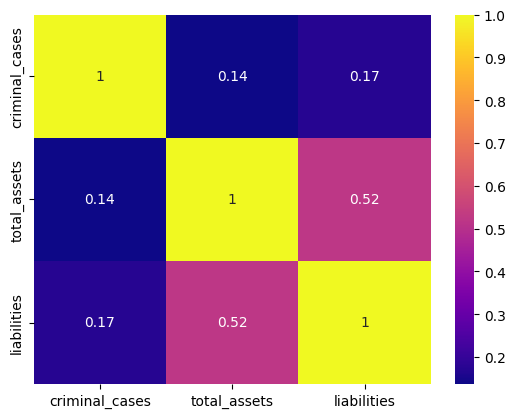

In [ ]:
sns.heatmap(test.select_dtypes(include=np.number).corr(), annot=True, cmap='plasma')